In [6]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [8]:
height = 256
weight = 256

batch_size = 32
epochs = 50

dataset = tf.keras.preprocessing.image_dataset_from_directory(
    directory='PlantVillage',
    shuffle=True,
    image_size=(height, weight),
    batch_size=batch_size
)

Found 2152 files belonging to 3 classes.


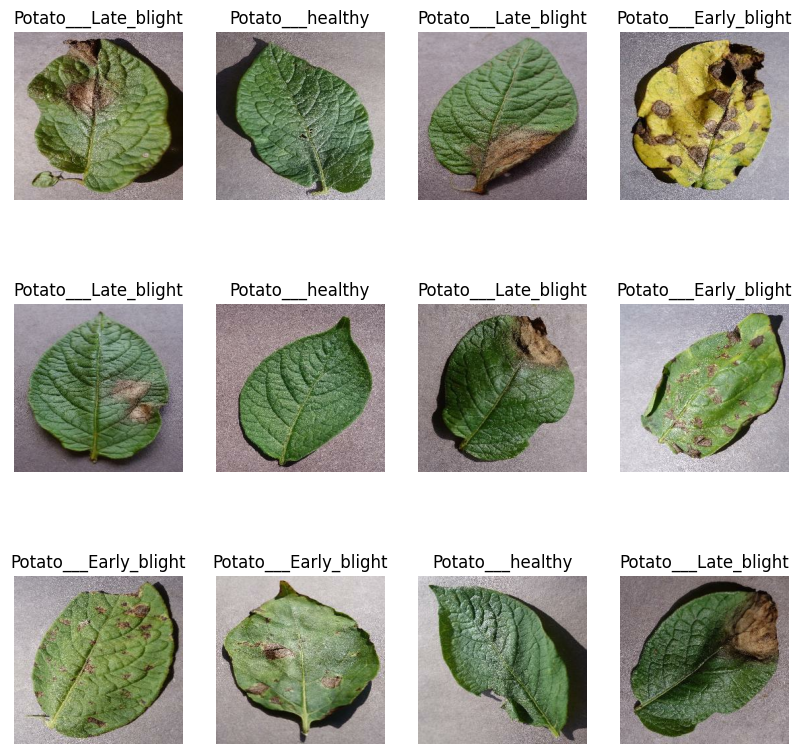

In [64]:
class_names = dataset.class_names

plt.figure(figsize=(10, 10))
for image_batch, label_batch in dataset.take(1): ## One batch
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype('uint8'))
        plt.title(class_names[label_batch[i]])
        plt.axis('off')

In [65]:
train_size = int(len(dataset) * 0.8)

train_ds = dataset.take(train_size)
len(train_ds)

54